In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("College.csv")
dataset = dataset.rename(columns = {'Unnamed: 0': 'College'})
dataset = dataset.set_index('College')
dataset.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


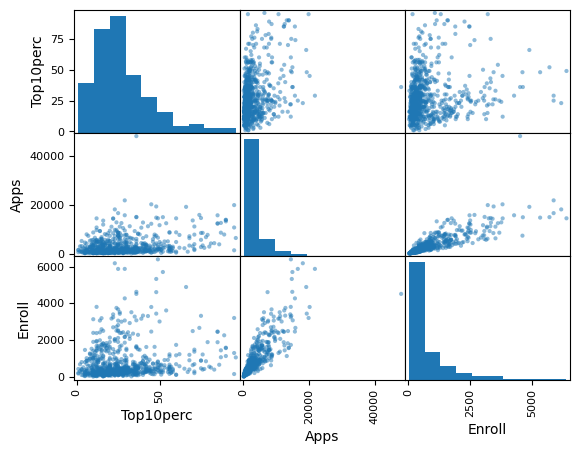

In [3]:
dataset.describe()
columns = ["Top10perc", "Apps", "Enroll"]
plt = pd.plotting.scatter_matrix(dataset[columns])

In [4]:
import seaborn as sns

<Axes: xlabel='Private', ylabel='Outstate'>

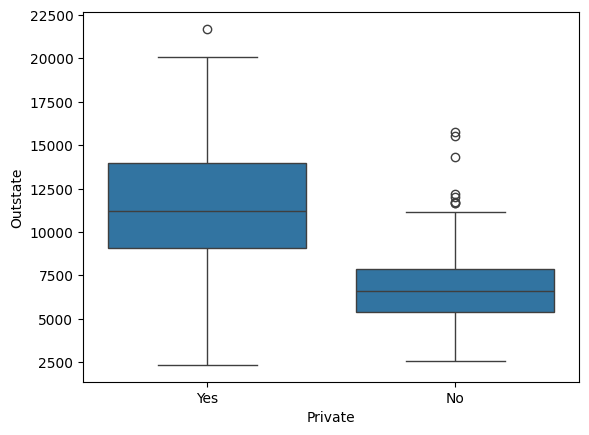

In [5]:
# Boxplot of Outstate tuition, grouped by Private (Yes/No)
sns.boxplot(x="Private", y="Outstate", data=dataset)

In [6]:
# Assuming 'dataset' is your DataFrame
dataset["Elite"] = ["Yes" if x > 50 else "No" for x in dataset["Top10perc"]]

# Display the first few rows to check the new column
print(dataset[["Top10perc", "Elite"]].head())

elite = dataset['Elite'].value_counts()
print(elite)

                              Top10perc Elite
College                                      
Abilene Christian University         23    No
Adelphi University                   16    No
Adrian College                       22    No
Agnes Scott College                  60   Yes
Alaska Pacific University            16    No
Elite
No     699
Yes     78
Name: count, dtype: int64


<Axes: xlabel='Outstate', ylabel='Elite'>

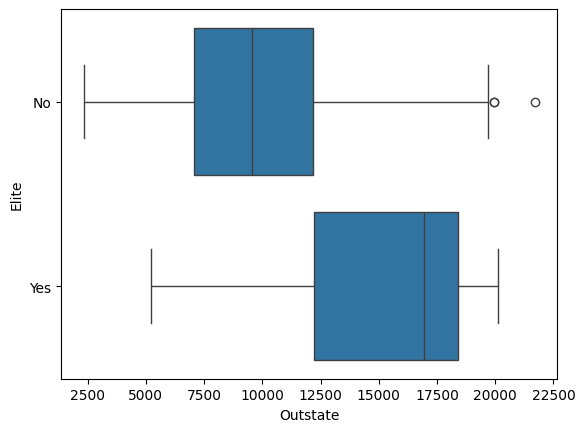

In [7]:
sns.boxplot(x="Outstate", y="Elite", data=dataset)

[<Axes: > <Axes: > <Axes: > <Axes: >]


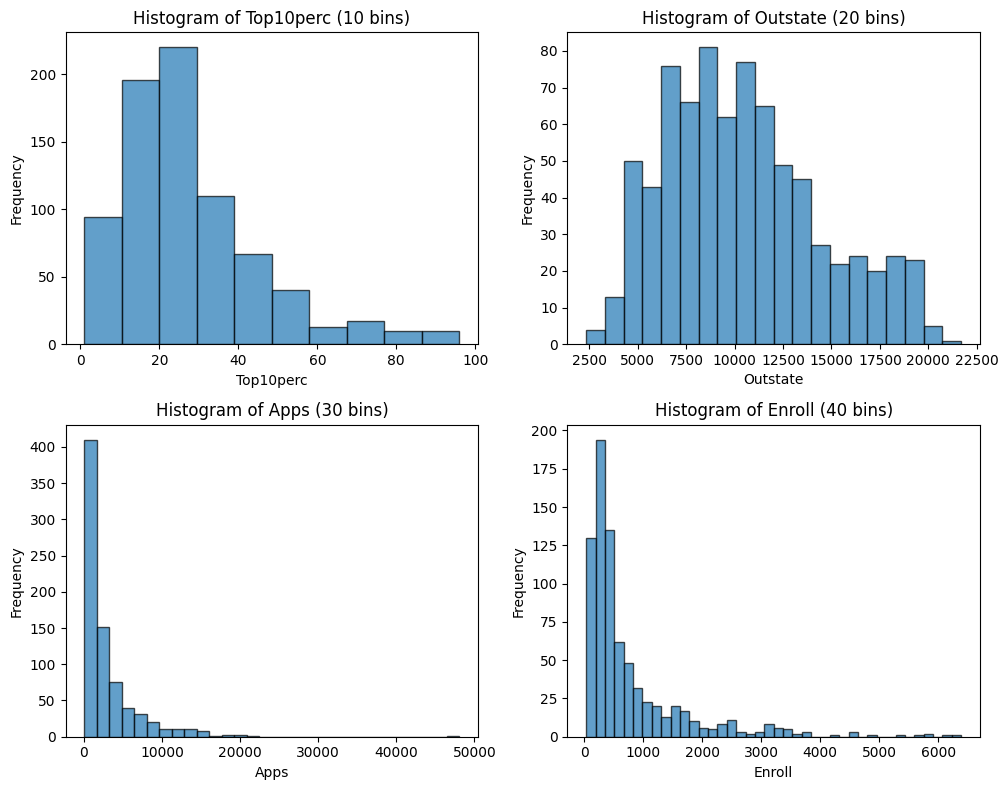

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (assuming 'dataset' is your DataFrame)
quantitative_vars = ["Top10perc", "Outstate", "Apps", "Enroll"]  # Select quantitative columns

# Create a figure with 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # 2x2 layout

# Flatten the 2D array of axes for easier iteration
axes = axes.flatten()
print(axes)

# Different numbers of bins for each variable
bins_list = [10, 20, 30, 40]  

# Loop through variables and plot histograms
for i, var in enumerate(quantitative_vars):
    dataset[var].plot.hist(ax=axes[i], bins=bins_list[i], alpha=0.7, edgecolor="black")
    axes[i].set_title(f"Histogram of {var} ({bins_list[i]} bins)")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()
